## NAME : SOWNDARIYA M
### PGAA - 02

# ANN

In [1]:
#importing libraries
import numpy as np
import keras
from keras import layers
from keras import Sequential
# Define Window size (color images)
img_window = (32,32,3)

# Flatten the Window shape
input_shape = np.prod(img_window)
print(input_shape)

# Define Model with two hidden layers(neurons)
model = Sequential(
    [layers.Input(shape=img_window),
     layers.Flatten(),
     layers.Dense(input_shape//2 ,activation="relu"),
     layers.Dense(input_shape//2 ,activation="relu"),
     layers.Dense(1,activation="sigmoid"),
     ]
)
# After model is "built" call its summary() menthod to display its contents
model.summary()

3072
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 1536)              2360832   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1537      
Total params: 7,082,497
Trainable params: 7,082,497
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Initialization
# Size of the batches of data, adjust it depends on RAM
batch_size = 16
epochs = 20
# Compile  model with 3 arguments: loss function, optimizer, and metrics function to judge model performance
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["binary_accuracy"])  #BCE

# Create ImagedataGenerator to split training, validation dataset
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Pizza Refund\\train'
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescaling factor
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

valid_dir = 'Pizza Refund\\test'
valid_datagen =ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_window[:2],
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
    )

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_window[:2],
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb')


Found 709 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [4]:
train_generator.class_indices

{'Burnt_pizza': 0, 'Good_pizza': 1}

In [7]:
# Train the  model
hist = model.fit_generator(train_generator,steps_per_epoch = 683 // batch_size,epochs=20,
    validation_data=validation_generator,
    validation_steps= 40 // batch_size)

Epoch 1/20
 4/42 [=>............................] - ETA: 14s - loss: 0.9276 - binary_accuracy: 0.5312

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028E80285E00>
Traceback (most recent call last):

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 933, in generator_fn
    yield x[i]

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\Mayur\Anaconda3\lib\site-packages\PIL\Image.py", line 2943, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028E80285E00>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_729]

Function call stack:
train_function


## PLOTTING THE LOSS AND ACCURACY


In [6]:

acc = hist.history['binary_accuracy']
val_acc = hist.history['val_binary_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: name 'hist' is not defined

## Predicting a New Image

In [17]:
import os
path = 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

In [21]:
from keras.preprocessing import image
# Defining function to testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (32, 32))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 0:
        prediction = 'bad'
    else:
        prediction = 'good'
    return prediction

In [22]:
files

['C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (1).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (10).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (11).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (12).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (13).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (14).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (15).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Learning Exam\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test\\test_img (16).jpg',
 'C:\\Users\\sowndariya\\Desktop\\Deep Le

In [23]:
result_test = []
for i in files:
    result_test.append(testing_image(i))

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]


# PREDICTED TEST IMAGES WITH RESULT

good


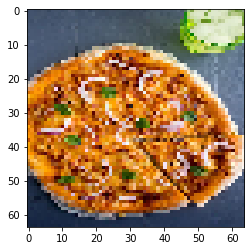

good


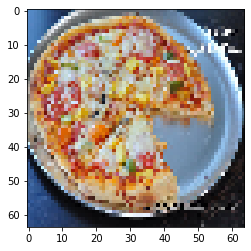

good


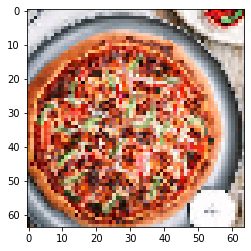

good


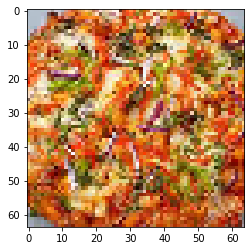

good


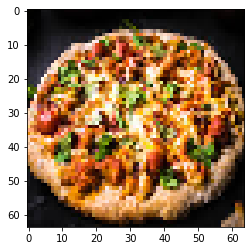

good


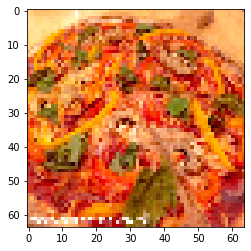

good


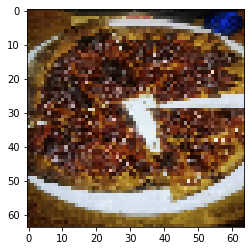

good


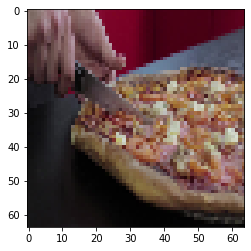

good


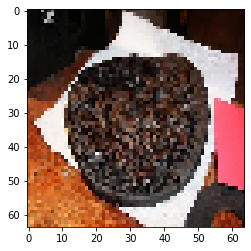

bad


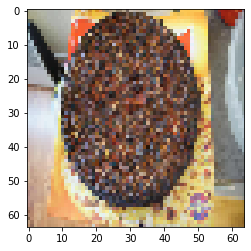

good


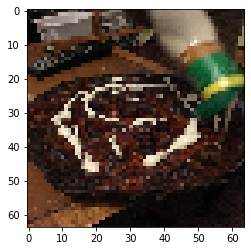

good


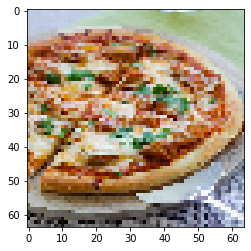

good


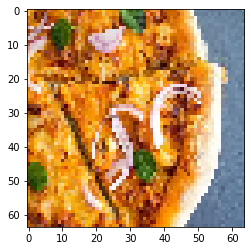

bad


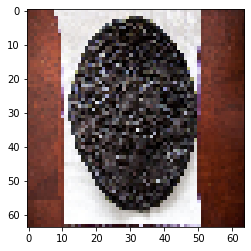

bad


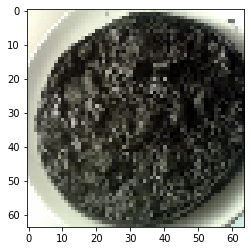

bad


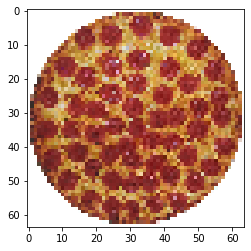

bad


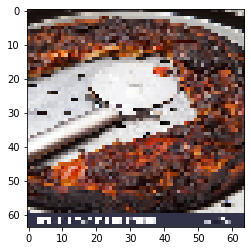

bad


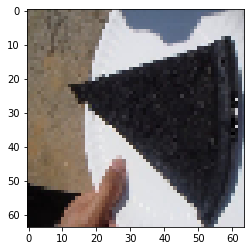

bad


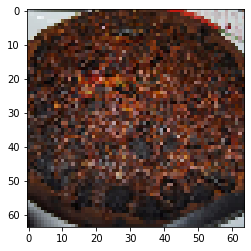

bad


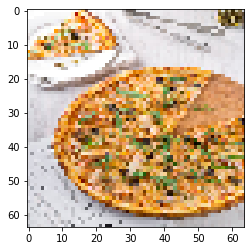

good


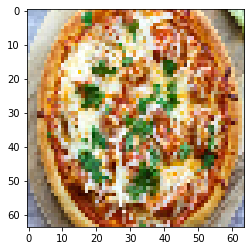

good


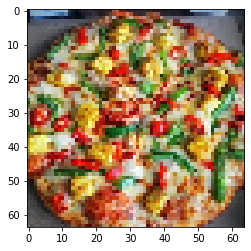

good


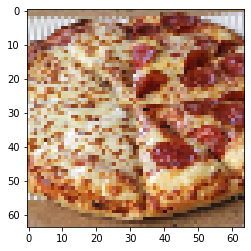

good


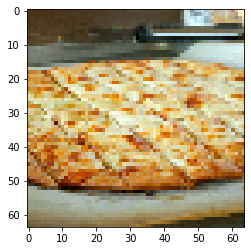

bad


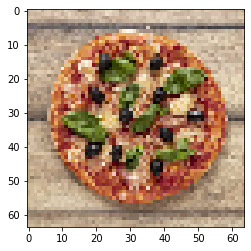

good


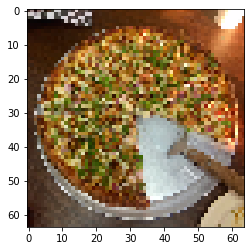

good


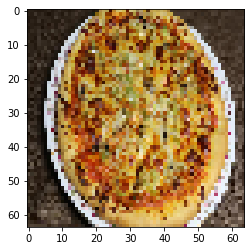

In [47]:
from matplotlib import pyplot
for i,j in zip(files,result_test):
    new_image=image.load_img(i,target_size=(64,64))
    print(j)
    #print(testing_image(i))
    pyplot.imshow(new_image)
    pyplot.show()

## EXPORTING OUTPUT TO CSV FILE

In [24]:

aa = pd.DataFrame(files)
bb = pd.DataFrame(result_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
result = pd.concat([aa,bb],axis=1)

<IPython.core.display.Javascript object>

In [26]:
result.columns = ['Image Name' , 'Test Images Output']

In [49]:
result

,Image Name,Test Images Output
0,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
1,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
2,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
3,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
4,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
5,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
6,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
7,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
8,C:\Users\sowndariya\Desktop\Deep Learning Exam...,good
9,C:\Users\sowndariya\Desktop\Deep Learning Exam...,bad


In [48]:
report_to_csv= result.to_csv('C:\\Users\\sowndariya\\Desktop\\ PIZZA CLASSIFICATION.csv')

## the training curves are rather closely tracking the validation curves. 

By leveraging regularization techniques  and by tuning the network's parameters (such as the number of filters per convolution layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 86-87%. However, it would prove very difficult to go any higher just by training ANN from scratch, simply because we used so little data to work with.